## NSGA-II

<cite data-cite="nsga2"></cite>

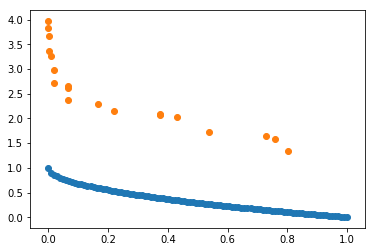

In [14]:
%matplotlib inline  

from pymoo.optimize import minimize
from pymoo.util import plotting
from pymop.factory import get_problem

# create the optimization problem
problem = get_problem("zdt1")
pf = problem.pareto_front()

res = minimize(problem,
               method='nsga2',
               method_args={'pop_size': 100},
               termination=('n_gen', 100),
               pf=pf,
               save_history=True,
               disp=False)

plotting.plot(pf, res.F, labels=["Pareto-front", "F"])
